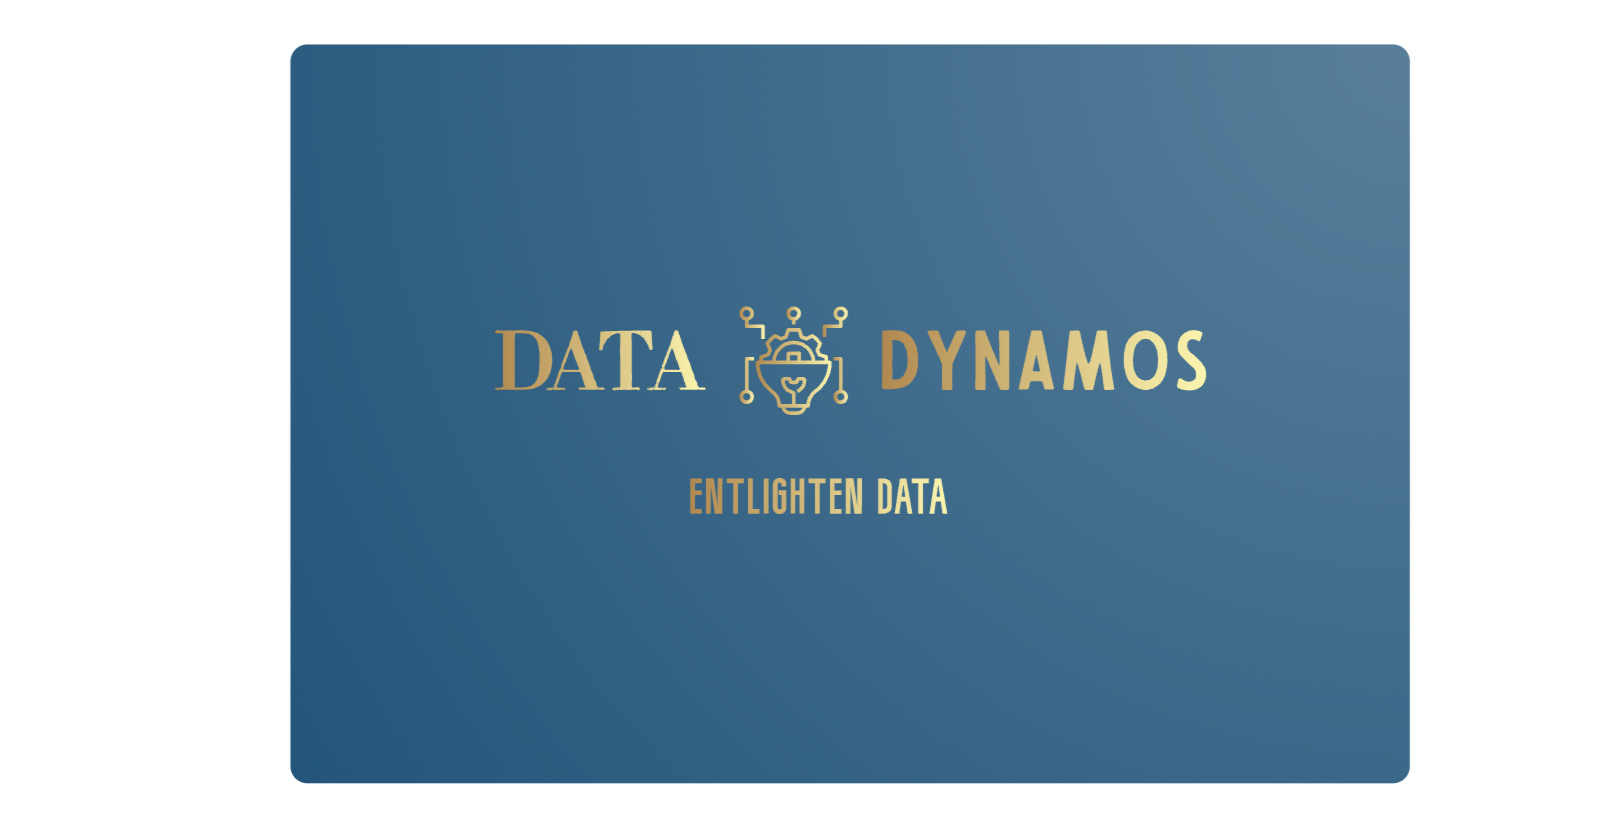

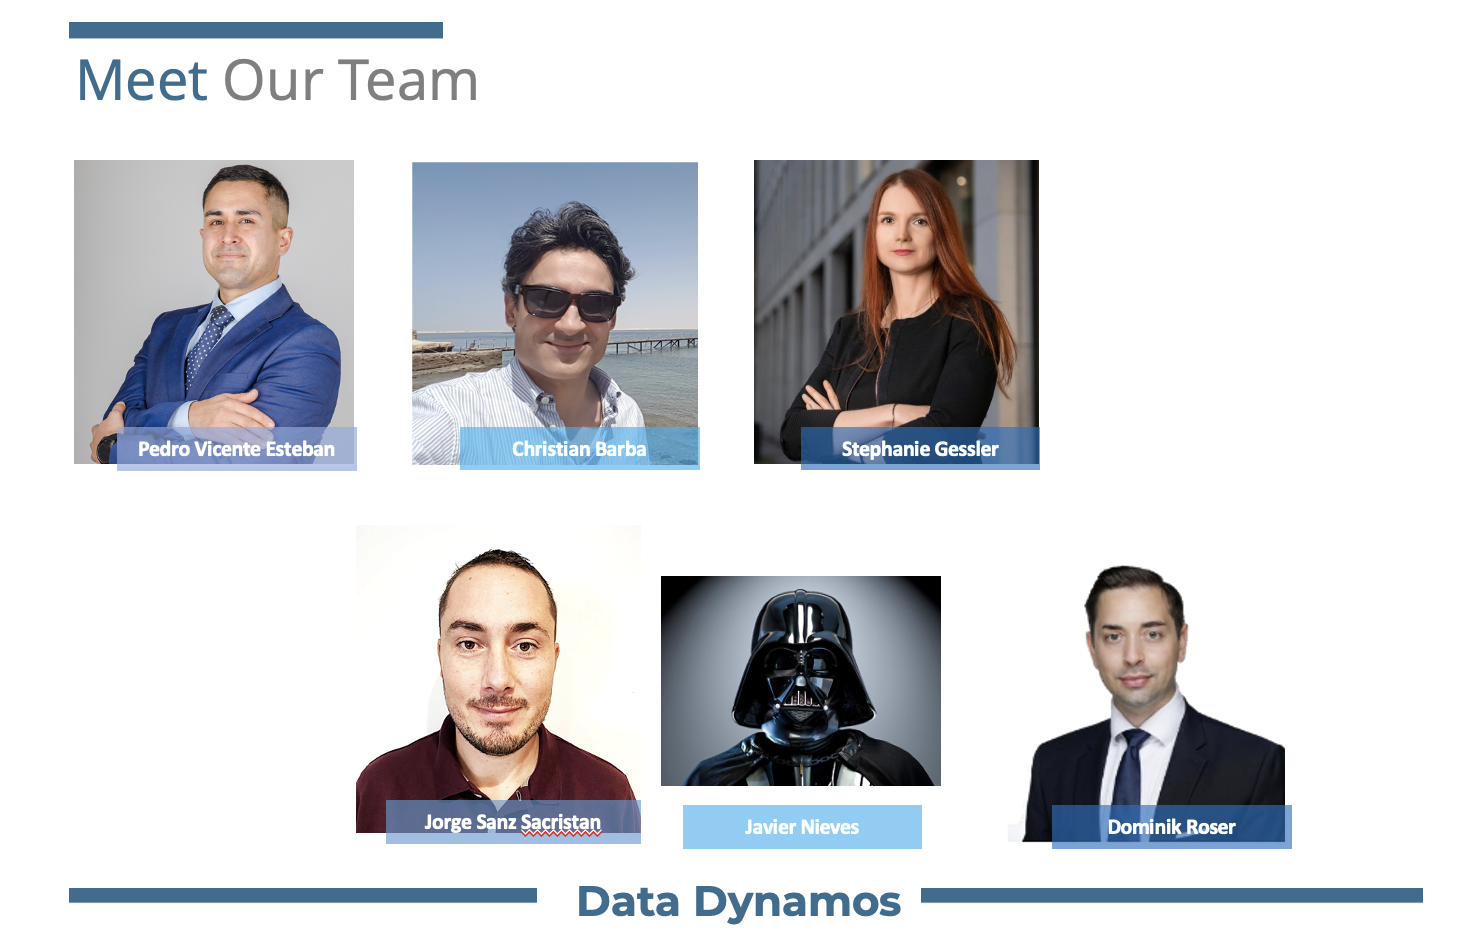

# SUMMARY - SKETCH FOR OVERALL VIEW

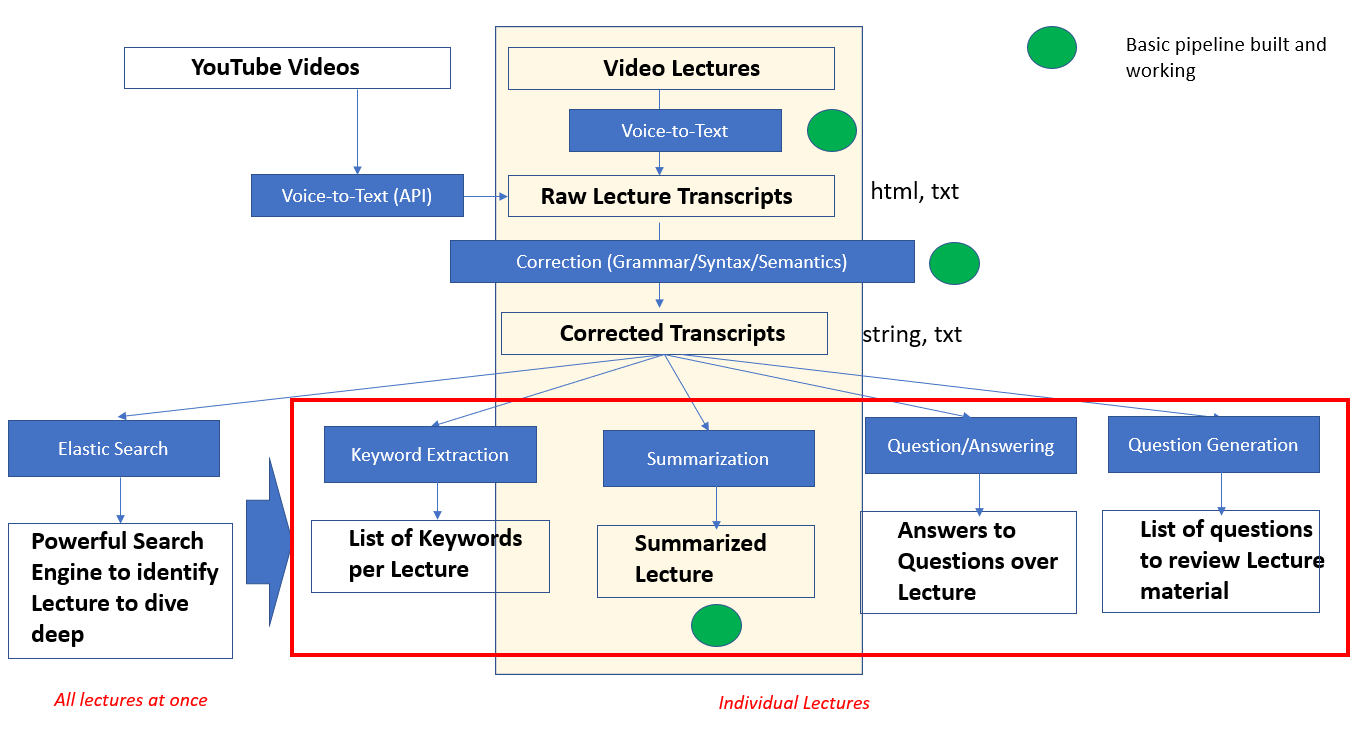

In [32]:
from IPython import display
display.Image(r"C:\Users\Javier\IE Students\Term 3 - Data Dynamos - Documentos\General\Natural Language Processing\notebooks\summary_sketch.PNG")

# EXAMPLE OUTCOME FROM BELOW PRELIMINARY NOTEBOOK (PROMISING)

### SUMMARY USING NORMAL BERT FOR SUMMARIZATION OVER CLEANED TEXT USING GPT3 (CHUNKING)

### SUMMARY USING NEW GPT3 API FOR SUMMARIZATION OVER CLEANED TEXT USING GPT3 (CHUNKING)

### SUMMARY OF KEYWORDS (need to eliminate repetitions)

### AUTOMATIC GENERATED QUESTIONS

### QUESTION ANSWERING

# A. DATA INGESTION: 2 SOURCES (YOUTUBE & ZOOM CLASS LECTURE)

## A.1 YOUTUBE TRANSCRIPT

In [1]:
# !pip install youtube-transcript-api
from youtube_transcript_api import YouTubeTranscriptApi

In [2]:

srt = YouTubeTranscriptApi.get_transcript("X0Jw4kgaFlg")

# prints the result
print(srt)

[{'text': "hi everyone i'll get started okay so", 'start': 5.2, 'duration': 5.12}, {'text': "we're now i'm back for the second week", 'start': 7.68, 'duration': 4.039}, {'text': 'of', 'start': 10.32, 'duration': 2.96}, {'text': 'cs224n', 'start': 11.719, 'duration': 4.04}, {'text': 'um on natural language processing with', 'start': 13.28, 'duration': 4.24}, {'text': 'deep learning', 'start': 15.759, 'duration': 3.841}, {'text': "okay so um for today's lecture what", 'start': 17.52, 'duration': 4.16}, {'text': "we're going to be looking at is", 'start': 19.6, 'duration': 3.28}, {'text': 'all the', 'start': 21.68, 'duration': 4.32}, {'text': 'math details of doing neural net', 'start': 22.88, 'duration': 5.44}, {'text': 'learning first of all looking at', 'start': 26.0, 'duration': 5.359}, {'text': 'how we can work out by hand um gradients', 'start': 28.32, 'duration': 5.6}, {'text': 'for training neural networks and then', 'start': 31.359, 'duration': 4.081}, {'text': "looking at how it

In [3]:
all_lecture_YT = ''
for zz in srt:
    all_lecture_YT = all_lecture_YT+zz['text']+' '
all_lecture_YT

"hi everyone i'll get started okay so we're now i'm back for the second week of cs224n um on natural language processing with deep learning okay so um for today's lecture what we're going to be looking at is all the math details of doing neural net learning first of all looking at how we can work out by hand um gradients for training neural networks and then looking at how it's done more algorithmically which is known as the back propagation algorithm and correspondingly for you guys um well i hope you remembered that you know one minute ago was when assignment one was due and everyone has handed that in if by some chance you haven't handed it in um really should hand it in as soon as possible best to preserve those late days for the harder assignments so i mean i actually forgot to mention we actually did make one change um for this year to make it a bit easier when occasionally people join the class a week late if you want to this year in the grading um assignment one can be discount

## A.2 ZOOM VIDEO TRANSCRIPT

In [4]:
f = open(r"C:\Users\Javier\IE Students\Term 3 - Data Dynamos - Documentos\General\Natural Language Processing\transcripts_zoom\NLP\TEXT_ZOOM_NLP_TEXT_CLASSIFICATION.txt", "r")
# f = open(r"C:\Users\javiern\Desktop\yo\NLP\GP\TEXT_ZOOM_NLP_TEXT_CLASSIFICATION.txt", "r")

print(f.read())

Hi! There, Hill. Okay. So as you saw, let's give the rest of the time to join. Can you see my slides right? Hi! Hello! Hello, everyone! Hello! Good afternoon! Hi! There! Hello! Good afternoon. How are you doing? Okay. Hi there! Good afternoon. I guess we can kick off. So the idea today is to talk a little bit about text classification which is going to be the first of the metal along with processing applications that we are going to to the dive into. So just a quick reminder of previous session, both on on the video confidence and on the Forum right on previous confident, we talk about, we talk about the language mode. Okay. So nowadays language modeling in importance, because, as we have seen most of the representations that we are using nowadays for the program which processes are based on some type of language mobile. The the on which modeling is the simplistic problem in which, given sentence you try to pretty, which is going to be the next work of the sentence, or what is going to

In [5]:
with open(r"C:\Users\Javier\IE Students\Term 3 - Data Dynamos - Documentos\General\Natural Language Processing\transcripts_zoom\NLP\TEXT_ZOOM_NLP_TEXT_CLASSIFICATION.txt", "r") as file:
    lecture_ie = file.read().replace('\n', '')
print("NUmber of characters: ", len(lecture_ie))
lecture_ie

NUmber of characters:  65509


"Hi! There, Hill. Okay. So as you saw, let's give the rest of the time to join. Can you see my slides right? Hi! Hello! Hello, everyone! Hello! Good afternoon! Hi! There! Hello! Good afternoon. How are you doing? Okay. Hi there! Good afternoon. I guess we can kick off. So the idea today is to talk a little bit about text classification which is going to be the first of the metal along with processing applications that we are going to to the dive into. So just a quick reminder of previous session, both on on the video confidence and on the Forum right on previous confident, we talk about, we talk about the language mode. Okay. So nowadays language modeling in importance, because, as we have seen most of the representations that we are using nowadays for the program which processes are based on some type of language mobile. The the on which modeling is the simplistic problem in which, given sentence you try to pretty, which is going to be the next work of the sentence, or what is going t

# B. TRANSCRIPT CORRECTION

## B.1 CORRECTOR T5
#### https://happytransformer.com/text-to-text/
#### https://www.vennify.ai/grammar-correction-python/
#### https://huggingface.co/vennify/t5-base-grammar-correction
#### https://colab.research.google.com/drive/18VqcJOovSS7zApN4jQf1kpv_XyGON53J?usp=sharing&ref=vennify-inc
#### fine tune your model: https://www.vennify.ai/fine-tune-grammar-correction/

#### Comments:
- This is only a small trial, this needs investigation, optimization and application by chunks (sentences) to complete text.
- maxlength seems to be 512

In [6]:
# pip install happytransformer

In [7]:
from happytransformer import HappyTextToText, TTSettings

happy_tt = HappyTextToText("T5", "vennify/t5-base-grammar-correction")


03/02/2023 23:06:28 - INFO - happytransformer.happy_transformer -   Using model: cpu


In [8]:
beam_settings =  TTSettings(num_beams=5, min_length=1, max_length=512)

# Add the prefix "grammar: " before each input 
result = happy_tt.generate_text(lecture_ie[0:2000], args=beam_settings)

print(result.text)

So the idea today is to talk a little bit about text classification, which is going to be the first of the metal along with processing applications that we are going to dive into. The idea is that you need to have a deeper understanding of the language that you are talking about. Otherwise you will not be able to properly play it, because you need to know the semantics of the sentence. So the idea is that when language modeling is properly able to do that, and we can see how we can assume that it is because it is.


## B.2 CORRECTOR GPT3

#### https://openai.com/product

#### Pending items:
- Automate to split, correct and join automatically any incoming text, and join back correctly
- The chunks need to take into account to gather complete sentences and maximize length by chunk without surpassing max_length of model.
- Here a manual example done in order to see the quality of the correction (very good quality)
- Need to investigate meaning of model parameters, so far default ones and max_tokens just to make it work this specific case.
- IMPORTANT: some of the chunks are shortened upon corrections, need to investigate (parameters?, beta-app?, etc...), or maybe it is so bad that it cannot correct, or maybe we need to shorten the texts to correct
- Another idea...pass it first through T5 grammar correction tool and then GPT3

In [12]:
#pip install openai

In [122]:
# Automate this step controlling max characters/tokens but stopping at end of sentence.

to_correct_chunks = [lecture_ie[0:4921-66], lecture_ie[4921-66:8559-66], lecture_ie[8559-66:13001-66], 
               lecture_ie[13001-66:17994-66], lecture_ie[17994-66:23059-66], lecture_ie[23059-66:28051-66], lecture_ie[28051-66:33017-66], 
              lecture_ie[33017-66:37982-66], lecture_ie[37982-66:43026-66], lecture_ie[43026-66:48079-66],
              lecture_ie[48079-66:53115-66], lecture_ie[53115-66:57970-66], lecture_ie[57970-66:61954-66],
              lecture_ie[61954-66:]]

In [14]:
## Example before doing it for all chunks

In [18]:
import openai

openai.api_key = "YOUR KEY"

example_response_corrected = openai.Completion.create(
  model="text-davinci-003",
  prompt="Correct this to standard English:\n\n" + lecture_ie[0:1489],
  temperature=0,
  max_tokens=1500,
  top_p=1,
  frequency_penalty=0,
  presence_penalty=0
)


In [27]:
example_response_corrected['choices'][0]['text'].split("""\n\n""")[-1]

"Hi there! Good afternoon. How are you doing? Okay. So, let's give the rest of the time to join. Can you see my slides? Alright, so the idea today is to talk a little bit about text classification, which is going to be the first of the many natural language processing applications that we are going to dive into. Just a quick reminder of the previous session: we talked about language modeling. Nowadays, language modeling is important because most of the representations we use for processing are based on some type of language model. Language modeling is a simplistic problem in which, given a sentence, you try to predict which is going to be the next word of the sentence, or what some of the words in the sentence that you have removed are. This may not seem very interesting, but it is indeed. The idea is that if a language model is able to do this, it is because you need to have a deep understanding of the language you are talking about. Otherwise, you will not be able to properly play it

In [28]:
# Alternative regex
# re.findall(r'(?:.+\n)*.*', example_response_corrected['choices'][0]['text'])

In [29]:
## Comparison with original lecture

lecture_ie[0:1489]

"Hi! There, Hill. Okay. So as you saw, let's give the rest of the time to join. Can you see my slides right? Hi! Hello! Hello, everyone! Hello! Good afternoon! Hi! There! Hello! Good afternoon. How are you doing? Okay. Hi there! Good afternoon. I guess we can kick off. So the idea today is to talk a little bit about text classification which is going to be the first of the metal along with processing applications that we are going to to the dive into. So just a quick reminder of previous session, both on on the video confidence and on the Forum right on previous confident, we talk about, we talk about the language mode. Okay. So nowadays language modeling in importance, because, as we have seen most of the representations that we are using nowadays for the program which processes are based on some type of language mobile. The the on which modeling is the simplistic problem in which, given sentence you try to pretty, which is going to be the next work of the sentence, or what is going t

### For loop to correct in manually defined chunks above and joint back corrected texts

In [30]:
corrected_text = ''
count=1
for zz in to_correct_chunks:
    print("Starting Chunk Number: ", count)
    response_corrected = openai.Completion.create(
        model="text-davinci-003",
        prompt="Correct this to standard English:\n\n" + zz,
        temperature=0,
        max_tokens=1500,
        top_p=1,
        frequency_penalty=0,
        presence_penalty=0)
    #corrected_text = corrected_text + response_corrected['choices'][0]['text'] #re.findall(r'(?:.+\n)*.*', response_corrected['choices'][0]['text'])[2]
    corrected_text = corrected_text + response_corrected['choices'][0]['text'].split("""\n\n""")[-1]
    count+=1

Starting Chunk Number:  1
Starting Chunk Number:  2
Starting Chunk Number:  3
Starting Chunk Number:  4
Starting Chunk Number:  5
Starting Chunk Number:  6
Starting Chunk Number:  7
Starting Chunk Number:  8
Starting Chunk Number:  9
Starting Chunk Number:  10
Starting Chunk Number:  11
Starting Chunk Number:  12
Starting Chunk Number:  13


In [175]:
example_ind = openai.Completion.create(
model="text-davinci-003",
prompt="Correct this to standard English:\n\n" + to_correct_chunks[2][:2050],
temperature=0,
max_tokens=1500,
top_p=0.5,
frequency_penalty=0,
presence_penalty=0)

In [176]:
to_correct_chunks[2][:2050]

" so personalization recommendations, at least in which you can apply that specification in order to find out or see if or to find a reason right. So you have a piece of information, and you would like to understand if this piece of information belongs. But it has been written by a particular author, or if even this is a a new. a new piece of information, or something that you have copy based different from where it's right text. Classification is the answer over there, because you have a set of for examples of it, a set of books written by a given outdoors. So a new piece of information is from this and author of the or not. Actually, this is brother relevant nowadays, because one of the main problems with the to G. P. And G. P. 3 on this notion interfaces is that you can easily. You can easily generate a piece of information right. There has been some efforts in order to create some type of classifiers in order to attack, leave. A a given piece of information has been generated or no

In [177]:
example_ind['choices'][0]['text']

"\n\nClassification is the answer here, because you have a set of examples of a given author's work. So you can use a text classifier to decide if a given piece of information belongs to a certain category, such as whether it is sarcastic or fake news. There are other examples, but anytime you have text or information that you would like to categorize, you can create a text classifier to decide if it belongs to a certain process."

In [178]:
example_ind['choices'][0]['text'].split("""\n\n""")[-1]

"Classification is the answer here, because you have a set of examples of a given author's work. So you can use a text classifier to decide if a given piece of information belongs to a certain category, such as whether it is sarcastic or fake news. There are other examples, but anytime you have text or information that you would like to categorize, you can create a text classifier to decide if it belongs to a certain process."

#### Note here the shortening of the string due to "correction" by GPT, needs investigation

In [84]:
print(len(corrected_text))
corrected_text

40254


'Hi there! Good afternoon. How are you doing? Okay. So, as you saw, let\'s give the rest of the time to join. Can you see my slides right? Good afternoon. I guess we can kick off. So, the idea today is to talk a little bit about text classification, which is going to be the first of the machine learning applications that we are going to dive into. So, just a quick reminder of the previous session, both on the video conference and on the forum. On the previous conference, we talked about language modeling. Nowadays, language modeling is important, because, as we have seen, most of the representations that we are using nowadays for programs that process language are based on some type of language model. The language model is a simplistic problem in which, given a sentence, you try to predict which is going to be the next word of the sentence, or what is going to be some of the words in the sentence that you have removed. This could seem not to be very interesting, but it is indeed. The i

#### New chunks over corrected text (Note that this chunks may not be valid or optimum for each

In [192]:
# Automate this step controlling max characters/tokens but stopping at end of sentence.

to_analyze_chunks = [corrected_text[0:4869], corrected_text[4869:8409], corrected_text[8409:12899], 
               corrected_text[12899:17939], corrected_text[17939:23039], corrected_text[23039:28018], corrected_text[28018:32956],
              corrected_text[32956:37938], corrected_text[37982:]]

# C1. KEYWORD EXTRACTION - PEDRO / STEFFI

## C1.1 BERT FOR KEYWORD EXTRACTION
##### https://huggingface.co/yanekyuk/bert-uncased-keyword-extractor

#### Comments and Notes:
- This is not developed
- Just copied so far from huggingface but not ran yet

In [34]:
# Ongoing - WIP

## C1.2 OPENAI GPT KEYWORD EXTRACTION

### Need some optimization but just to show how it works in its basic form

In [ ]:
# Example

In [193]:
import openai

response_corrected_keyword = openai.Completion.create(
  model="text-davinci-003",
  prompt="Extract keywords from this text:\n\n" + to_analyze_chunks[0],
  temperature=0.5,
  max_tokens=1500,
  top_p=1.0,
  frequency_penalty=0.8,
  presence_penalty=0.0
)

In [194]:
response_corrected_keyword['choices'][0]['text'].split("""\n\nKeywords: """)[-1]

'text classification, language modeling, n-grams, Recurrent Neural Network, Long Short-Term Memory, Transformer, self-attention, BERT, GPTs 1 2 3 transfer learning, personalization, recommendation'

In [197]:
keywords_list = ''
count=1
for zz in to_analyze_chunks:
    print("Starting Chunk to Analyze Number: ", count)
    response_corrected_keyword = openai.Completion.create(
        model="text-davinci-003",
        prompt="Extract keywords from this text:\n\n" + zz,
        temperature=0,
        max_tokens=1500,
        top_p=1,
        frequency_penalty=0,
        presence_penalty=0)
    #corrected_text = corrected_text + response_corrected['choices'][0]['text'] #re.findall(r'(?:.+\n)*.*', response_corrected['choices'][0]['text'])[2]
    keywords_list = keywords_list + ' ' +response_corrected_keyword['choices'][0]['text'].split("""\n\nKeywords: """)[-1]
    count+=1

Starting Chunk to Analyze Number:  1
Starting Chunk to Analyze Number:  2
Starting Chunk to Analyze Number:  3
Starting Chunk to Analyze Number:  4
Starting Chunk to Analyze Number:  5
Starting Chunk to Analyze Number:  6
Starting Chunk to Analyze Number:  7
Starting Chunk to Analyze Number:  8
Starting Chunk to Analyze Number:  9


In [199]:
# Needs optimization, but after cleaning, a set should be taken to have unique terms
# Also, take a look to remove \n that appear

keywords_list

' language modeling, n-grams, Recurrent Neural Network, Long Short-Term Memory, Transformer, BERT, GPTs, transfer learning, text classification, personalization, recommendation content-based recommendation, text specificity, personalization, recommendations, text classification, GPT-3, natural language interfaces, positive/negative, manual rules, linguistics, expressions, supervised machine learning, likelihood, prior information, sports newspaper, financial time. posterior probability, naive assumption, independent, n-gram modeling, text classification, deep learning, maximum entropy classifier, mathematical framework, probabilistic framework, uniform probability, training set, annotated dataset, sports, vocabulary, probability distribution, infinite documents probabilities, rule, limitation, space, solutions, configuration, maximum entropy, classifier, probability, classes, words, model, hypothesis, entropy, uniform, assumptions, deep learning, recurrence, sequences, text, embedded l

# C2. SUMMARIZATION

## EXAMPLE C2.1: BART LARGE CNN SUMMARIZATION (WITH CORRECTED AND ORIGINAL)
https://huggingface.co/philschmid/bart-large-cnn-samsum

In [200]:
import transformers, torch, tensorflow

In [201]:
from transformers import pipeline
summarizer_BASE = pipeline("summarization", model="philschmid/bart-large-cnn-samsum")

conversation = '''Jeff: Can I train a 🤗 Transformers model on Amazon SageMaker? 
Philipp: Sure you can use the new Hugging Face Deep Learning Container. 
Jeff: ok.
Jeff: and how can I get started? 
Jeff: where can I find documentation? 
Philipp: ok, ok you can find everything here. https://huggingface.co/blog/the-partnership-amazon-sagemaker-and-hugging-face                                           
'''
summarizer_BASE(conversation)

[{'summary_text': "Jeff wants to train a Transformers model on Amazon SageMaker. He can use the new Hugging Face Deep Learning Container. Jeff can find the documentation on Huggingface's blog.    .   The blog is available at: https://huggingface.co/blog/the-partnership-amazon-sagemaker-and-hugling-face."}]

### Base summarizer model does not allow to go beyond 1024 tokens. Under chunking strategy, need lot of chunks
### Here just some trials with parameters

In [202]:
# class lecture example

lecture_ie_part_BASE_1 = summarizer_BASE(lecture_ie[0:3000])
lecture_ie_part_BASE_1

[{'summary_text': 'Today, Hill is going to talk about text classification and processing applications. In the previous session, both on the video confidence and on the Forum, we talk about the importance of language mode. The first attempts on which modeling were based on and simplistic methods based on Ingrams. Now, thanks to different declaring architectures, we are able to properly model long sequences of information.'}]

In [203]:
# class lecture example

lecture_ie_part_BASE_1 = summarizer_BASE(corrected_text[0:3000])
lecture_ie_part_BASE_1

[{'summary_text': 'Today, we are going to talk about text classification in machine learning applications. In the previous conference, we talked about language modeling. Nowadays, most of the representations that we are using nowadays for programs that process language are based on some type of language model. The most well-known model is probably the Recurrent Neural Network.'}]

In [204]:
# class lecture example

lecture_ie_part_BASE_1 = summarizer_BASE(corrected_text[0:3000], encoder_no_repeat_ngram_size=3)
lecture_ie_part_BASE_1

[{'summary_text': "Today, we're going to discuss text classification. It's the first machine learning application that we'll dive into at the conference. The previous session covered the topic of language models and how they're used in the development of machine learning programs. Today, we'll talk about how deep learning can be used to solve this problem."}]

In [205]:
# class lecture example

lecture_ie_part_BASE_1 = summarizer_BASE(corrected_text[0:3000], num_beams=4)
lecture_ie_part_BASE_1

[{'summary_text': 'Today, we are going to talk about text classification in machine learning applications. In the previous conference, we talked about language modeling. Nowadays, most of the representations that we are using nowadays for programs that process language are based on some type of language model. The most well-known model is probably the Recurrent Neural Network.'}]

In [206]:
# class lecture example

lecture_ie_part_BASE_1 = summarizer_BASE(corrected_text[0:3000], num_beams=4, encoder_no_repeat_ngram_size=3)
lecture_ie_part_BASE_1

[{'summary_text': "Today, we're going to discuss text classification. It's the first machine learning application that we'll dive into at the conference. The previous session covered the topic of language models and how they're used in the development of machine learning programs. Today, we'll talk about how deep learning can be used to solve this problem."}]

In [207]:
# class lecture example

lecture_ie_part_BASE_1 = summarizer_BASE(corrected_text[0:3000], num_beams=4, encoder_no_repeat_ngram_size=3, min_length=32, max_length=128)
lecture_ie_part_BASE_1

[{'summary_text': "Today, we're going to discuss text classification. It's the first machine learning application that we'll dive into at the conference. The previous session covered the topic of language models and their development."}]

### Systematic Chunking strategy: But needs optimization to cut end of sentences and not go beyond max_token_length

In [211]:
max_input_model_corrected = 3000 # number of characters
chunk_intervals_corrected = int(len(corrected_text) / max_input_model) +1
chunk_intervals_corrected

14

In [212]:
# Chunking Strategy, -summarizing over corrected text and joining afterwaeds

chunk_summmary_corrected = ''
for zz in range(chunk_intervals_corrected):
    print(zz, [str(zz*max_input_model)+':'+str(min((zz+1)*max_input_model_corrected,len(corrected_text)))])
    chunk_summmary_corrected = chunk_summmary_corrected + ' ' +summarizer_BASE(corrected_text[zz*max_input_model:min((zz+1)*max_input_model,len(corrected_text))], 
                                             num_beams=4, encoder_no_repeat_ngram_size=3, min_length=16, max_length=48)[0]['summary_text']
chunk_summmary_corrected

0 ['0:3000']
1 ['3000:6000']
2 ['6000:9000']
3 ['9000:12000']
4 ['12000:15000']
5 ['15000:18000']
6 ['18000:21000']
7 ['21000:24000']
8 ['24000:27000']
9 ['27000:30000']
10 ['30000:33000']
11 ['33000:36000']
12 ['36000:39000']
13 ['39000:40254']


" Today, we're going to discuss text classification. It's the first machine learning application that we'll dive into at the conference. The previous session covered the topic of language models and their development. Transformer is an architecture from 2017 that aims to direct a language model's attention to the relationship of words and their content. Transformer can be used to do a variety of tasks. Today we will talk about text There are some text classifiers based on simple rules, but they are expensive and they need to be updated every time a new thing is added to the data. The next step in the training of the classifier is The maximum entropy classification is a simple method used in text classification that works well. It is based on the idea that the relationship between a word and a previous one is more likely to be true than the previous one. The maximum entropy classification classifier is based on the theory of probability. It works by dividing the number of words in a doc

## EXAMPLE C2.2: MODELS FOR LARGE NUMBER OF TOKENS (16k): 2 models to explore
- https://huggingface.co/pszemraj/led-large-book-summary
- https://huggingface.co/pszemraj/long-t5-tglobal-base-16384-book-summary

https://huggingface.co/pszemraj/led-large-book-summary
https://colab.research.google.com/gist/pszemraj/3eba944ddc9fc9a4a1bfb21e83b57620/summarization-token-batching.ipynb#scrollTo=8oZf92zeZQ2d

https://colab.research.google.com/drive/12LjJazBl7Gam0XBPy_y0CTOJZeZ34c2v?usp=sharing#scrollTo=W7-QHmRiAMB9

In [213]:
# Did trials, but need to develop and compare with rest

In [214]:
# TO DEVELOP

## EXAMPLE C2.3: GPT API

In [ ]:
#pip install openai

In [216]:
# Max OpenAI is 4097 tokens
# As before, needs to be done with complete sentences, this is just a trial

max_input_model_corr_sum = 5000 # number of characters
chunk_intervals_corr_sum = int(len(corrected_text) / max_input_model) +1
chunk_intervals_corr_sum


9

In [227]:
#import os
import openai


chunk_gpt_summmary = ''
for zz in range(chunk_intervals_corr_sum):
    print(zz, [str(zz*max_input_model)+':'+str(min((zz+1)*max_input_model,len(corrected_text)))])
    
    response = openai.Completion.create(
    model="text-davinci-003",
    prompt=  str(corrected_text[zz*max_input_model:min((zz+1)*max_input_model,len(corrected_text))]) + "\n\nTl;dr",
    temperature=0.7,
    max_tokens=64,
    top_p=1,
    frequency_penalty=0,
    presence_penalty=1
    )

    chunk_gpt_summmary = chunk_gpt_summmary + ' ' + response['choices'][0]['text'].split("""\n\n""")[-1]


0 ['0:5000']
1 ['5000:10000']
2 ['10000:15000']
3 ['15000:20000']
4 ['20000:25000']
5 ['25000:30000']
6 ['30000:35000']
7 ['35000:40000']
8 ['40000:40254']


In [228]:
chunk_gpt_summmary

"  Text classification is a machine learning application used to classify text into two classes, such as positive or negative. It is useful in scenarios such as personalization or content-based recommendation. Language modeling is an important part of this process, as it helps create representations that can be used for transfer learning. This includes architectures such as  - Text classification is a common scenario in content-based recommendation and personalization. It can be used to classify documents into different categories or to determine if a piece of information has been generated or not. Traditional machine learning algorithms like Naive Bayes, Maximum Likelihood Estimation and N-gram models are often used for : The maximum entropy classifier is a 19th century method used for text classification. It involves assigning uniform probabilities to each class, then counting the number of times a word appears in each class and dividing it by the total number of times that word appe

# C3: QUESTION GENERATION
- https://huggingface.co/mrm8488/t5-base-finetuned-question-generation-ap (as example, we need to look for more and select best)

In [229]:
from transformers import AutoModelWithLMHead, AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("mrm8488/t5-base-finetuned-question-generation-ap")
model = AutoModelWithLMHead.from_pretrained("mrm8488/t5-base-finetuned-question-generation-ap")

def get_question(answer, context, max_length=64):
    input_text = "answer: %s  context: %s </s>" % (answer, context)
    features = tokenizer([input_text], return_tensors='pt')

    output = model.generate(input_ids=features['input_ids'], 
               attention_mask=features['attention_mask'],
               max_length=max_length)

    return tokenizer.decode(output[0])


The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.
C:\Users\Javier\anaconda3\lib\site-packages\transformers\models\auto\modeling_auto.py:969: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(
The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.


In [233]:
zz = 2

context = corrected_text[zz*max_input_model:min((zz+1)*max_input_model,len(corrected_text))]
answer = ""

get_question(answer, context)

Token indices sequence length is longer than the specified maximum sequence length for this model (1170 > 512). Running this sequence through the model will result in indexing errors


'<pad> question: What is the basic concept of the maximum entropy classifier?</s>'

In [234]:
zz = 1

context = corrected_text[zz*max_input_model:min((zz+1)*max_input_model,len(corrected_text))]
answer = ""

get_question(answer, context)

'<pad> question: What is the most common scenario in text-based recommendation?</s>'

In [235]:
zz = 0

context = corrected_text[zz*max_input_model:min((zz+1)*max_input_model,len(corrected_text))]
answer = ""

get_question(answer, context)

'<pad> question: What is the name of the new architecture that we will use to talk about text classification?</s>'

In [236]:
zz = 5

context = corrected_text[zz*max_input_model:min((zz+1)*max_input_model,len(corrected_text))]
answer = ""

get_question(answer, context)

'<pad> question: What is the main idea of transfer learning 101?</s>'

In [237]:
zz = 4

context = corrected_text[zz*max_input_model:min((zz+1)*max_input_model,len(corrected_text))]
answer = ""

get_question(answer, context)

'<pad> question: What is the cost of self-supervised learning?</s>'

# C4: QUESTION ANSWERING

## C4.1: DISTILBERT
- https://huggingface.co/distilbert-base-cased-distilled-squad

In [239]:
from transformers import pipeline
question_answerer = pipeline("question-answering", model='distilbert-base-cased-distilled-squad')

Downloading:   0%|          | 0.00/473 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/249M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

In [242]:
context = corrected_text
question = "what topics are covered in today's lecture?"
result = question_answerer(question=question,     context=context)
print("QUESTION: ", question)
print(
f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}"
)

QUESTION:  what topics are covered in today's lecture?
Answer: 'text classification', score: 0.7775, start: 227, end: 246


In [243]:
context = corrected_text
question = "what models are used for text classification?"
result = question_answerer(question=question,     context=context)
print("QUESTION: ", question)
print(
f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}"
)

QUESTION:  what models are used for text classification?
Answer: 'deep learning methods that we talked about the other day, or neural nets', score: 0.7172, start: 38786, end: 38858


In [247]:
context = corrected_text
question = "what is the basis of the maximum entropy classifier?"
result = question_answerer(question=question,     context=context)
print("QUESTION: ", question)
print(
f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}"
)

QUESTION:  what is the basis of the maximum entropy classifier?
Answer: 'n-grams', score: 0.7203, start: 1612, end: 1619


In [248]:
context = corrected_text
question = "what is fine tuning a deep learning model?"
result = question_answerer(question=question,     context=context)
print("QUESTION: ", question)
print(
f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}"
)

QUESTION:  what is fine tuning a deep learning model?
Answer: 'retraining the layer', score: 0.8242, start: 29553, end: 29573


In [249]:
context = corrected_text
question = "what is the best text classifier?"
result = question_answerer(question=question,     context=context)
print("QUESTION: ", question)
print(
f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}"
)

QUESTION:  what is the best text classifier?
Answer: 'largest entropy', score: 0.3963, start: 15277, end: 15292


In [ ]:
# Explore Chunking strategy for question-answering